/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


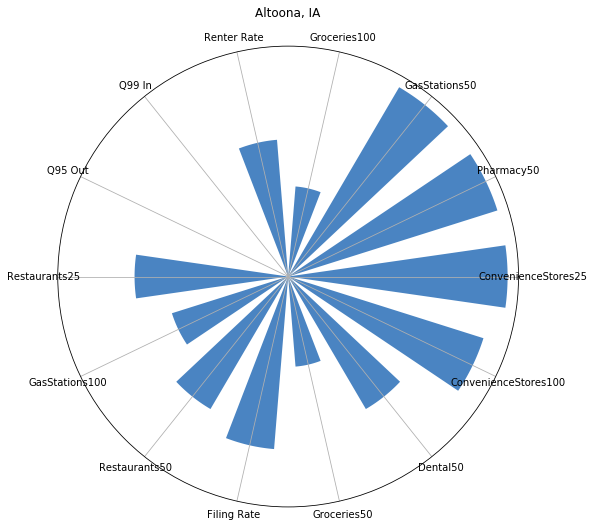

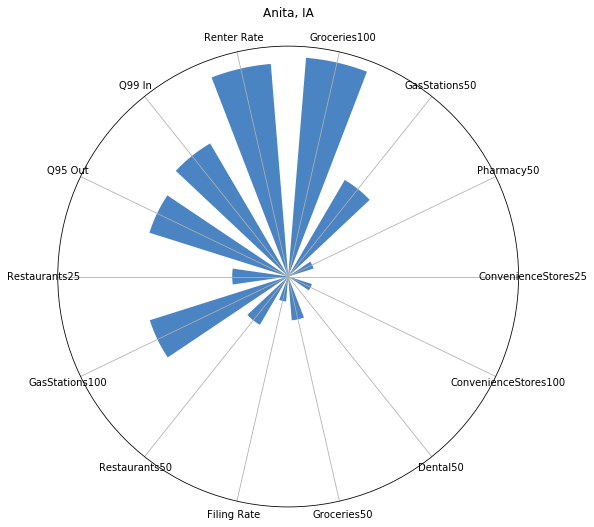

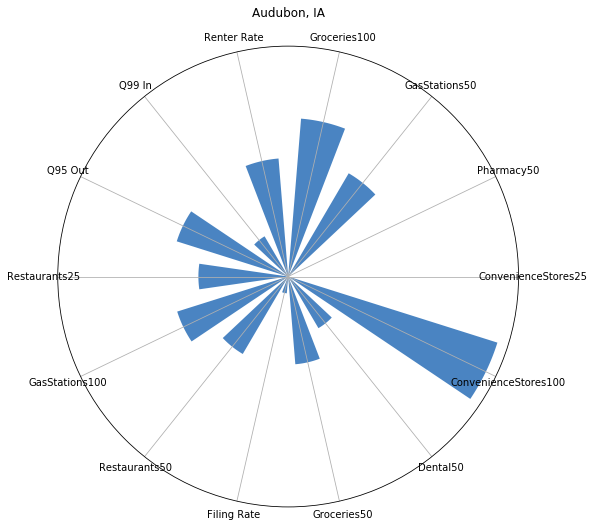

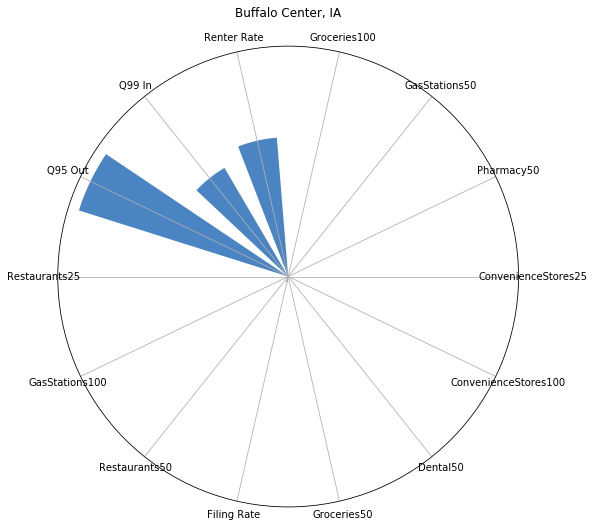

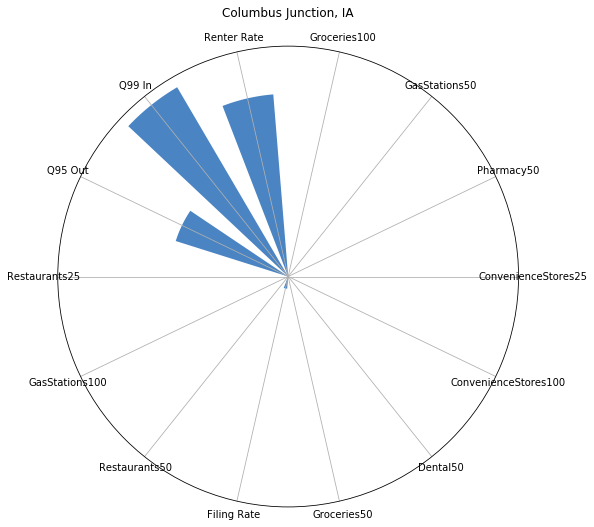

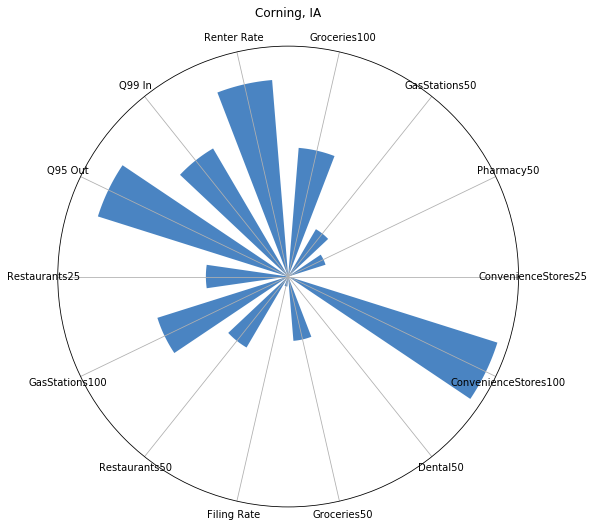

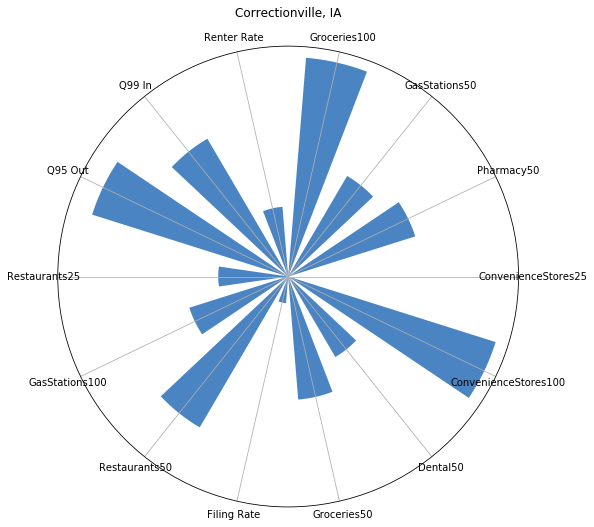

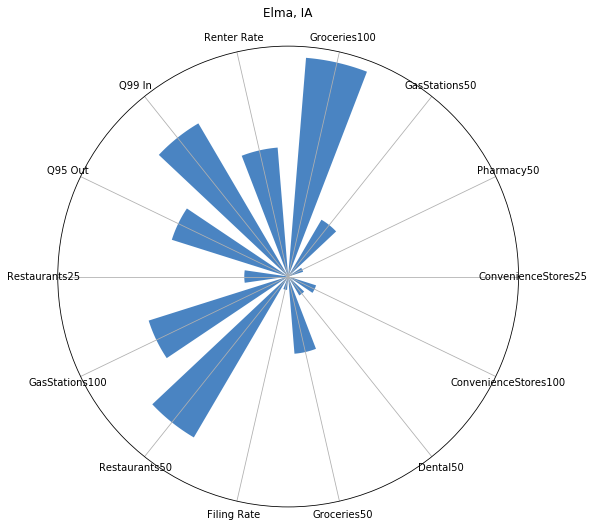

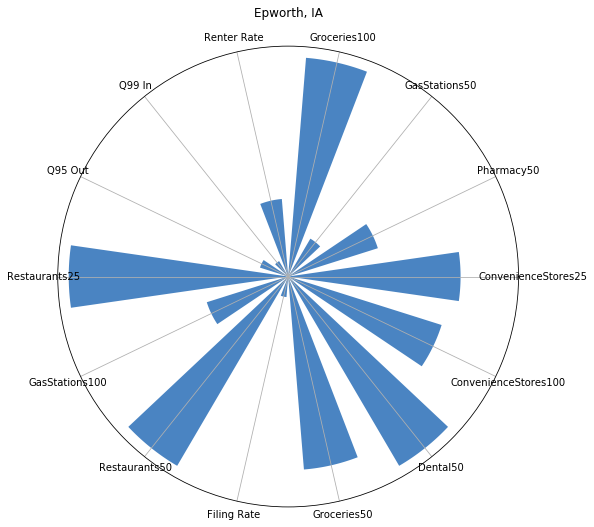

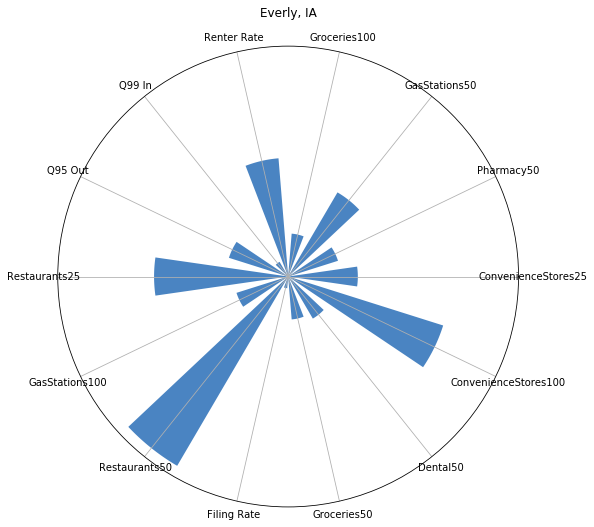

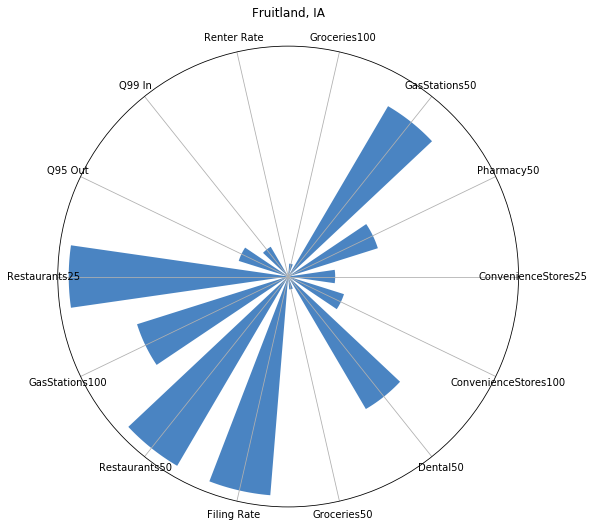

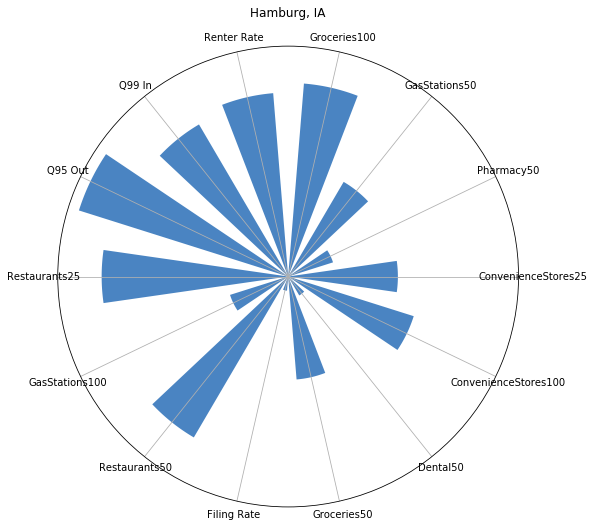

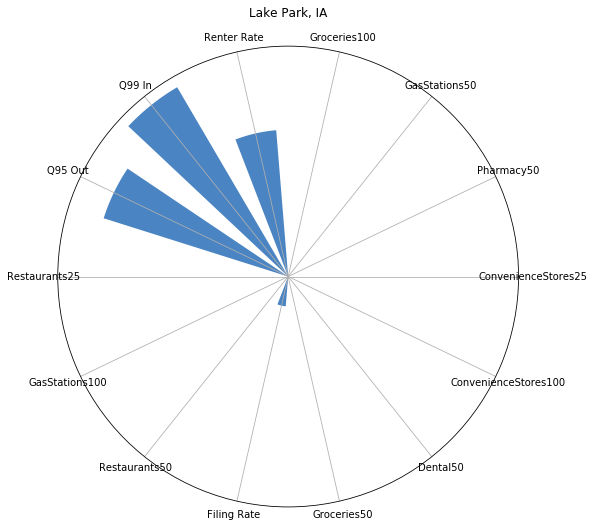

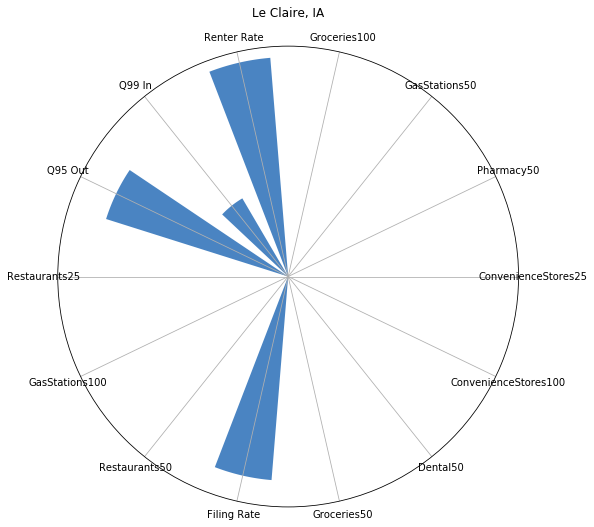

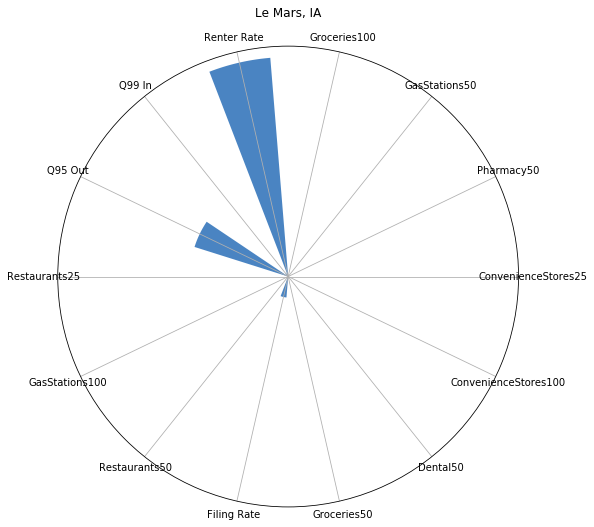

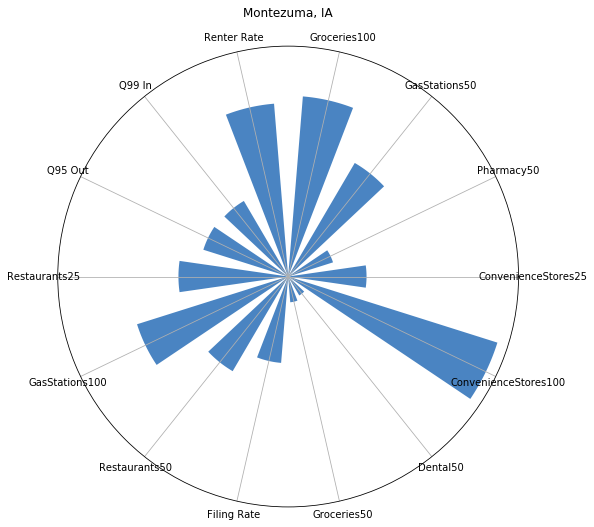

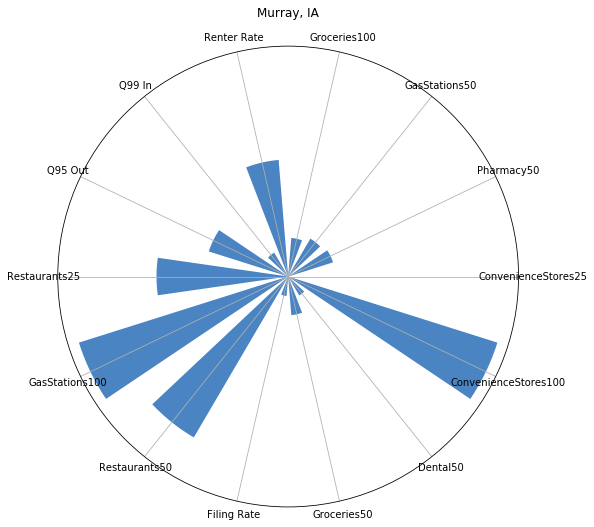

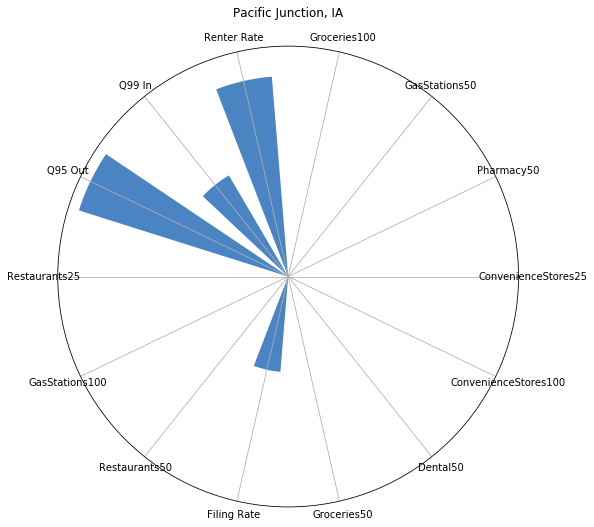

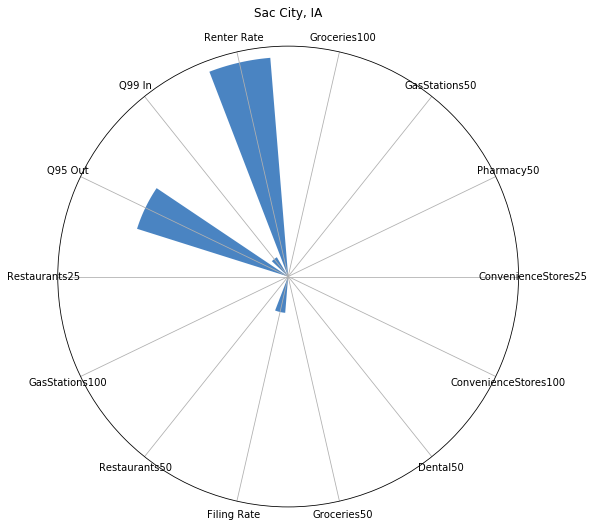

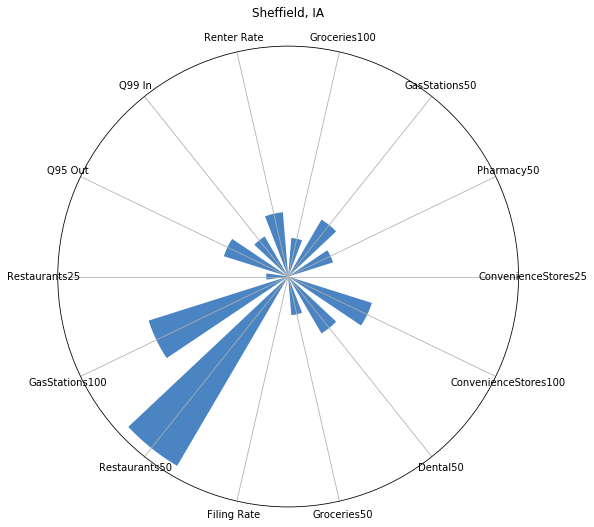

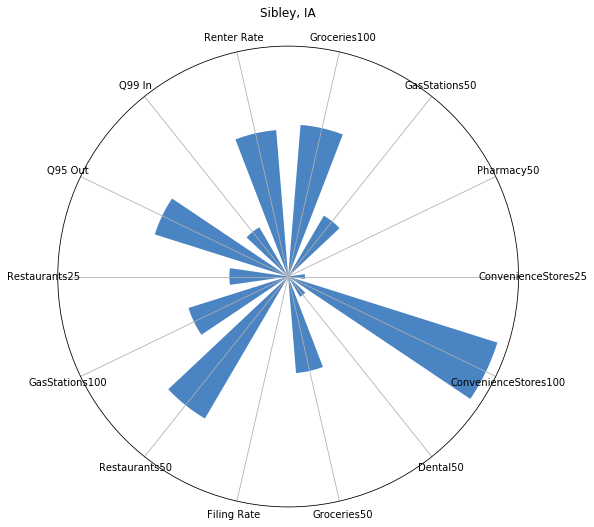

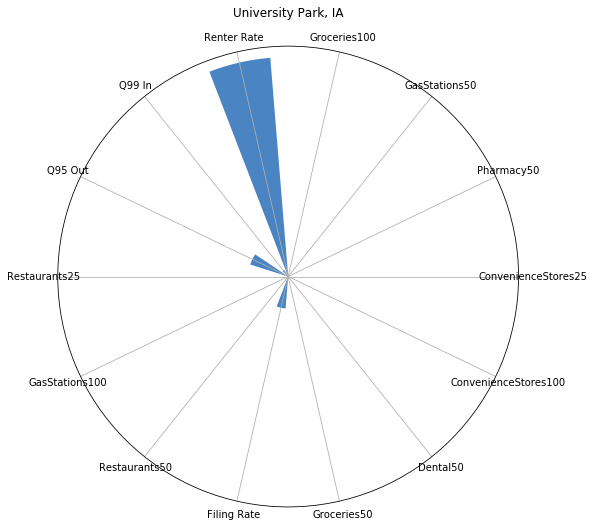

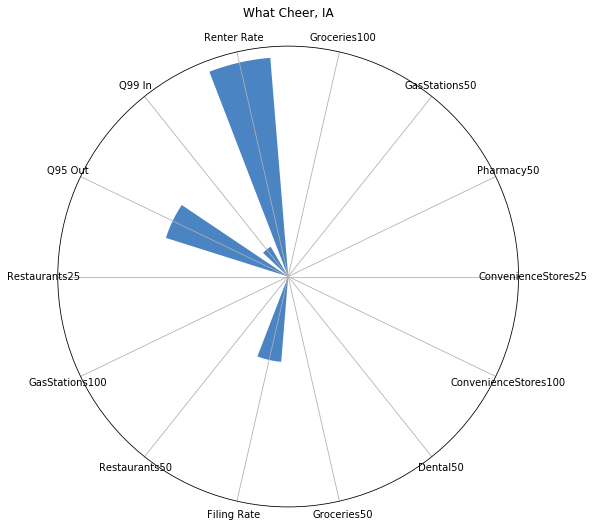

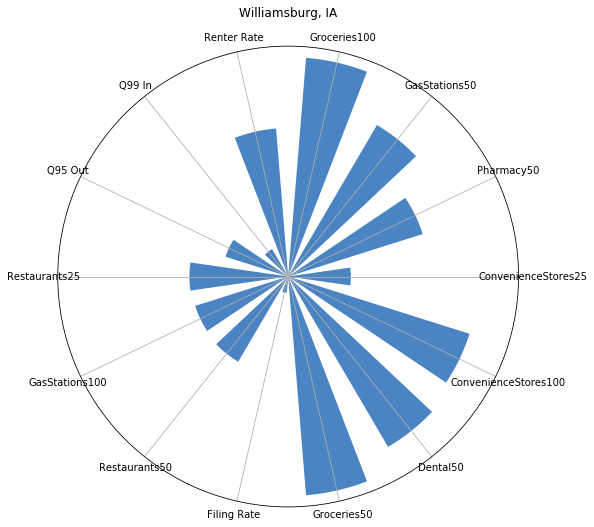

In [20]:
import numpy as np
import matplotlib.cm as cm
from matplotlib.pyplot import figure, show, rc
import pandas as pd
import sys
sys.path.insert(0, '/Users/ewd/ShrinkSmart/')
from ShrinkSmart import ShrinkSmart
import re
%matplotlib inline

scalarDF = pd.read_csv("scalar-features-full.csv").drop(["Unnamed: 0"], axis=1)
origDF = scalarDF
scalarDF = scalarDF.drop(["Population", "Lat", "Lon", "Samples", "category"], axis=1).fillna(0)

#plotCols = ['City', 'Optometrist50', 'Restaurants25', 'Q99 Out', 'Restaurants100', 'GasStations50', 'Q99 In',
#     'ConvenienceStores100', 'DollarStore100', 'Groceries100', 'ChildCare100', 'Poverty Rate', 'Dental50',
#     'Rent Burden', 'Filing Rate']
plotCols = ['City', 'ConvenienceStores25', 'Pharmacy50', 'GasStations50', 'Groceries100', 'Renter Rate', 'Q99 In', 
            'Q95 Out', 'Restaurants25', 'GasStations100', 'Restaurants50', 'Filing Rate', 'Groceries50',
     'Dental50', 'ConvenienceStores100']

scalarDF = scalarDF[plotCols]

for col in list(scalarDF.columns)[1:]:
    r = scalarDF[col].max() - scalarDF[col].min()
    m = scalarDF[col].min()
    scalarDF[col] = scalarDF[col].apply(lambda x: (x - m)/r)

cities = list(scalarDF["City"].unique())

for theCity in cities:
    data = scalarDF[scalarDF["City"] == theCity].drop(["City"], axis=1)

    fig = figure(figsize=(8,8))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
    
    radii = np.array(data.iloc[0])
    N = len(radii)
    theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
    width = 4/len(radii)
    bars = ax.bar(theta, radii, width=width, bottom=0.0)
    for r,bar in zip(radii, bars):
        bar.set_facecolor("#3677BC")
        bar.set_alpha(0.9)
    ax.set_xticks(theta)
    ax.set_xticklabels(data.columns)
    ax.set_yticks([])
    ax.set_title(theCity)
    fileName = re.sub("\W+", "_", theCity) + "thrive_" + "rose_chart.png"
    fig.savefig(fileName)


In [24]:
origDF.columns

Index(['City', 'Prop Locals Working', 'Prop Workers Local', 'Population',
       'Lat', 'Lon', 'Child Care Capacity', 'Poverty Rate', 'Renter Rate',
       'Median Rent', 'Median Income', 'Rent Burden', 'Eviction Rate',
       'Filing Rate', 'Samples', 'Q50 In', 'Q90 In', 'Q95 In', 'Q99 In',
       'Q50 Out', 'Q90 Out', 'Q95 Out', 'Q99 Out', 'Job Market',
       'Scaled Job Market', 'Scaled Child Care', 'PayDayLoans5',
       'PayDayLoans25', 'PayDayLoans50', 'PayDayLoans100', 'Groceries5',
       'Groceries25', 'Groceries50', 'Groceries100', 'PawnShops5',
       'PawnShops25', 'PawnShops50', 'PawnShops100', 'ConvenienceStores5',
       'ConvenienceStores25', 'ConvenienceStores50', 'ConvenienceStores100',
       'Restaurants5', 'Restaurants25', 'Restaurants50', 'Restaurants100',
       'GasStations5', 'GasStations25', 'GasStations50', 'GasStations100',
       'Optometrist5', 'Optometrist25', 'Optometrist50', 'Optometrist100',
       'DollarStore5', 'DollarStore25', 'DollarStore50', 'Do

,City,Prop Locals Working,Prop Workers Local,Child Care Capacity,Poverty Rate,Renter Rate,Median Rent,Median Income,Rent Burden,Eviction Rate,...,Pharmacy100,Dental5,Dental25,Dental50,Dental100,CheckCashing5,CheckCashing25,CheckCashing50,CheckCashing100,category id
0,"Altoona, IA",0.922893,0.496664,1.000000,0.128833,0.625186,0.797499,0.800019,0.334717,0.394900,...,1.0000,1.0,0.7,0.7,0.35,NaN,NaN,NaN,0.0,1.0
1,"Anita, IA",0.230984,0.223962,0.053808,0.347008,0.571765,0.160546,0.166650,0.359366,0.088705,...,0.5000,0.0,0.0,0.0,0.10,NaN,NaN,NaN,0.0,0.0
2,"Audubon, IA",0.525449,0.448036,0.094371,0.477051,0.395730,0.203143,0.182811,0.117685,0.070945,...,0.1875,0.0,0.0,0.2,0.15,NaN,NaN,NaN,0.0,0.0
3,"Buffalo Center, IA",0.276170,0.375807,0.058775,0.411601,0.453194,0.255793,0.126795,0.162887,0.035201,...,0.0000,0.0,0.0,0.0,0.00,NaN,NaN,NaN,0.0,1.0
4,"Columbus Junction, IA",0.411919,0.321004,0.105960,0.608768,0.832844,0.341216,0.346676,0.314577,0.070853,...,0.0000,0.0,0.0,0.0,0.00,NaN,NaN,NaN,0.0,0.0
5,"Corning, IA",0.595683,0.490661,0.084437,0.331523,0.718730,0.000000,0.145485,0.240329,0.064933,...,0.3125,0.0,0.0,0.0,0.05,NaN,NaN,NaN,0.0,0.0
6,"Correctionville, IA",0.190389,0.153116,0.003311,0.743688,0.300141,0.194615,0.178577,0.636218,0.149401,...,0.7500,0.0,0.0,0.4,0.40,NaN,NaN,NaN,0.0,1.0
7,"Elma, IA",0.000000,0.000000,0.021523,0.436645,0.589607,0.342538,0.123135,0.000751,0.072333,...,0.3125,0.0,0.0,0.1,0.40,NaN,NaN,NaN,0.0,1.0
8,"Epworth, IA",0.441900,0.181492,0.042219,0.109388,0.354463,0.477563,0.689605,0.064197,0.119917,...,0.7500,0.0,1.0,1.0,0.85,NaN,NaN,NaN,0.0,1.0
9,"Everly, IA",0.953172,0.615992,0.034768,0.399132,0.486521,0.456081,0.364778,0.320589,0.045879,...,0.2500,0.0,0.0,0.2,0.15,NaN,NaN,NaN,0.0,1.0
